In [1]:
import os
os.chdir('../..')

In [2]:
from platform import python_version

print(python_version())

In [3]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
dataset = 'Chicago'

names = ['DATWGAN_99']

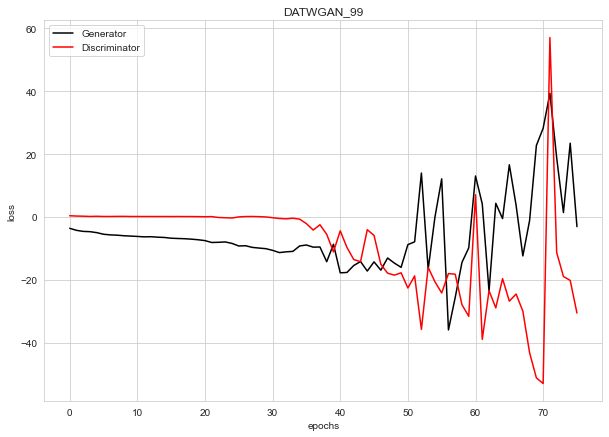

In [7]:
for n in names:
    
    output_folder = '../output/' + dataset + '/' + n + '/'

    with open(output_folder + 'logs/stats.json', 'r') as infile:
        data = json.load(infile)

    loss = {'gen': [],
            'discr': []
           }
    if 'WGAN' in n:
        loss['wgan_discr'] = []
        loss['grad_pen'] = []
        for d in data:
            loss['gen'].append(d['GAN_loss/g_loss'])
            loss['wgan_discr'].append(d['GAN_loss/d_loss'])
            loss['grad_pen'].append(10*d['GAN_loss/gradient_penalty'])
            loss['discr'].append((d['GAN_loss/d_loss']+10*d['GAN_loss/gradient_penalty']))
    else:
        for d in data:
            loss['gen'].append(d['GAN_loss/gen/final-g-loss'])
            loss['discr'].append(d['GAN_loss/discrim/loss'])

    plt.figure(figsize=(10,7))
    plt.plot(loss['gen'], 'k', label='Generator')
    plt.plot(loss['discr'], 'r', label='Discriminator')
    if 'wass' in n:
        plt.plot(loss['grad_pen'], 'r--', label='Grad. pen.')
        plt.plot(loss['wgan_discr'], 'r:', label='WGAN discr loss')
    plt.legend()

    plt.title(n)
    plt.xlabel('epochs')
    plt.ylabel('loss')

In [8]:
import os
from math import sin, cos

def main():
    a=0
    b=0

    height=24
    width=80
    #height=int(input("Enter Screen Height : "))
    #width=int(input("Enter Screen Width : "))
    
	# for clearing console (windows and unix systems)
    clear = "cls"
    if os.name == "posix":
        clear = "clear"

    os.system(clear)
    while True:
        z = [0 for _ in range(4*height*width)]
        screen = [' ' for _ in range(height*width)]

        j=0
        while j<6.28:
            j+=0.07
            i=0
            while i<6.28:
                i+=0.02

                sinA=sin(a)
                cosA=cos(a)
                cosB=cos(b)
                sinB=sin(b)

                sini=sin(i)
                cosi=cos(i)
                cosj=cos(j)
                sinj=sin(j)

                cosj2=cosj+2
                mess=1/(sini*cosj2*sinA+sinj*cosA+5)
                t=sini*cosj2*cosA-sinj* sinA

                # 40 is the left screen shift
                x = int(40+30*mess*(cosi*cosj2*cosB-t*sinB))
                # 12 is the down screen shift
                y = int(11+15*mess*(cosi*cosj2*sinB +t*cosB))
                # all are casted to int, ie floored
                o = int(x+width*y)
				# multiplying by 8 to bring in range 0-11 as 8*(sqrt(2))=11
				# because we have 11 luminance characters
                N = int(8*((sinj*sinA-sini*cosj*cosA)*cosB-sini*cosj*sinA-sinj*cosA-cosi *cosj*sinB))
				# if x,y inside screen and previous z-buffer is < mess 
				# i.e. when z[o] is 0 or the prev point is behind the new point
				# so we change it to the point nearer to the eye/ above prev point 
                if 0<y<height and 0<x<width and z[o] < mess:
                    z[o]=mess
                    screen[o]=".,-~:;=!*#$@"[N if N>0 else 0]

        # prints
        os.system(clear)
        for index, char in enumerate(screen):
            if index % width == 0:
                print()
            else:
                print(char, end='')

        # increments
        a+=0.04
        b+=0.02

In [9]:
main()


                                                                               
                                $@@@$$$$$$@@@$                                 
                            $$$$############$#$$$$                             
                          $####***!!!!!!!!!!***####$                           
                        ####**!!!!!!=====!!!!!!!**####                         
                      *##***!!!!==;:::~~:::;==!!!!**###*                       
                     !****!!!!=;;:~-,,,,,,-~:;;==!!!*****                      
                    =****!!!==;:~,..........-~::==!!!****!                     
                    !***!!!!=;:~-............,~:;==!!!***!                     
                    !!**!!!==;:-,..        ...-~;==!!!**!!                     
                   ;=!!!!!!!==;~,.          .,~:;==!!!**!!;                    
                   :=!!!**!!!!==;~          ~:=;=!!!!*!!!=:                    
                    =!!!********!!=    

                     !!!!!===;:~--,.......,,-~::;===!!!!!!                     
                    =!!!!==;:~~-,............,-~:;;==!!!!!                     
                    ==!===;::~-,......  .......-~::;===!!==                    
                   :=====;;:~--....        ....-~~:;;=====;                    
                   :=====;;::~-,..          ..,-~::;;=====;                    
                    ;=====;;;::-:~          ~~:~::;;;====;:                    
                    :;======;;======      ;======;;=====;;                     
                    -:;;=====!!!**####$$$##***!!!======;;:                     
                     ~:;;===!!***##$$@@@$$$##**!!!====;:~                      
                      -::;==!!***##$$$$$$$###**!!===;;:~                       
                        -:;;==!!!**########*!!!!==;;:~.                        
                         .-~:;==!!*!******!*!!=;;:~-,                          
                            .-~:;;;==!!!

                    :::::~~-,,....          .....,-~~:::;;;:                   
                    ~:::::~~--,,.::         -...,--~~::::::                    
                     ~:::::::~~:;=!**!   =!=;:---~~~::::::~                    
                     -~~::::;;;=!*##$$@$$##*!=;:::::::::~~                     
                      ,-~::;;;=!!*##$$@$$$#*!!=;;;::::~~-                      
                        -~::;==!!***######*!!!=;;:::~~-,                       
                          ,-~:;==!!**!!!**!!==;;:::~-,                         
                            .-~~:;;==!!!!!==;;:~~-,.                           
                                ..,-~~~~~~~--,..                               
                                                                               
                                                                               
                                                                               
                                        

                             .,~~;;==!!!!==;;:~~--,,..                         
                                ..,-~~::~~~~--,....                            
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                          ######***********######$$$$                          
                        ****!*!!!!!!!!!!!!!!******#####                        
                      *!!!!===!!!========!!!!!!!!********                      
                     !!======;;;;;;:::;;

                                                                               
                                                                               
                                                                               
                          ###################$$$$$$$                           
                       *****!!!***************#######$#                        
                      !!!=!!!!!!===!!!!!***!!!*****######                      
                     ==;=====;;;;;;;;=======!!!!*!*!******                     
                     ;=;:;:::::::::::::::;;;====!=!!!!*!!**!                   
                    ::::~~---,,,,------~~~::::;;;=====!!!!!!                   
                    :~---,,,..........,,,,--~~~~:::;;====!!==                  
                    ~--,...................,,,--~~:::;;;;====;                 
                     ,,.......................,,,--~~:::;:;;;;                 
                     ,............-;;   

                                                                               
                                                                               
                         ##########$$$$$$$$$$$$$$                              
                       **********###*########$$$$$$$                           
                      !!=!!!!!!!!*!*!******########$###                        
                     =;===========!!!!!!!*********######*                      
                     :;:;;::::;;;;======!!!!!!!!*!****#***                     
                     ~~~--~~~~~:::::::;;;;====!!!!!*!!!****                    
                     -,,,,....,,,--~~~~~::;;;;====!!!!!!!!!!!                  
                     ,..............,,--~~~~:::;;;====!=!!!=!                  
                      ..................,,---~~~:::;;;;=======                 
                       .....................,,--~~:~::;;;;;;;;                 
                        .........,~=*#$.

                       ........,,---~::::;;;=====!!!!!!!!!!!                   
                         ..........,--~~~~:;:;;;====!=!!!!=!=                  
                           ...........,,-~~~:::;;;;=;========                  
                             ....,~......,,--~~~::::;;;;;;;;;                  
                                ..~:=!......,,---~~~~:::;;;;;                  
                                  ..-:;;:......,,,--~~~~~~:::                  
                                     ..,--,.......,,,-----~--                  
                                        ..............,,,,,                    
                                            .............                      
                                                                               
                                                                               
                                                                               
                                        

                                    ....,---~~~::::;;;;;;;:                    
                                       ...,.-,--~~~~::::::~                    
                                         ......,,-----~~--                     
                                            .......,,,,,,                      
                                                ......                         
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                          $@@@@@@$                                             
                       #$$$$$$@@@@@@@$#                                        
                     !**###$$$$$$$$$@$$$

                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                       $$@@@@@@@$$                                             
                     *##$$$$@@@@@$$$#                                          
                    =*###$$$$$$$$$$$$##                                        
                    =***###$$$$$$$$$$$$#*                                      
                    ;=!**#####$$$$$$$$$$##*                                    
                    :=!!!***######$$$$$$####*                                  
                    ~;;=!!!***###############**                                
                     ~:;==!!******######

KeyboardInterrupt: 